# Balance Scale Dataset

# Comment analyser et traiter un Dataset désiquilibré  en Machine Learning ?

# L'étude va être réaliser en suivant toutes ces étapes :

    - Importer les données
    - Comprendre les données
    - Visualiser les données
    - Equilibrer les données : Equilibrer les données de 2 façon différentes / Tester les modèles de classification   
      Decision tree, Random Forest, XGBOOST, logistic regression
    - Identifier la problématique (classification)
    - Appliquer des modèles
    - Trouver le modèle plus pertinent
    - Analyser le résultat

Tester aussi :
select K-best (Fonction qui permet de sélectionner les features les plus importantes)

In [589]:
# Importer les packages nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from collections import Counter

In [590]:
# Importer les packages machine learning
#!pip intstall imblearn
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import plot_confusion_matrix, classification_report    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [591]:
# Importer la base de données
df = pd.read_csv("./scale.csv", sep=',')

In [592]:
#Nous allons examiner les 5 premières lignes de notre ensemble de données en utilisant la fonction pandas 'head'.
df. head()

,leftweight,leftdistance,rightweight,rightdistance,class
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R


In [593]:
#Voici les informations sur notre DataFrame, y compris le type d'index et les types de colonnes, les valeurs non nulles et l'utilisation de la mémoire")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   leftweight     625 non-null    int64 
 1   leftdistance   625 non-null    int64 
 2   rightweight    625 non-null    int64 
 3   rightdistance  625 non-null    int64 
 4   class          625 non-null    object
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [594]:
#Description statistique de notre ensemble de données
df.describe(include="all")

,leftweight,leftdistance,rightweight,rightdistance,class
count,625.000000,625.000000,625.000000,625.000000,625
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,L
freq,NaN,NaN,NaN,NaN,288
mean,3.000000,3.000000,3.000000,3.000000,NaN
std,1.415346,1.415346,1.415346,1.415346,NaN
min,1.000000,1.000000,1.000000,1.000000,NaN
25%,2.000000,2.000000,2.000000,2.000000,NaN
50%,3.000000,3.000000,3.000000,3.000000,NaN
75%,4.000000,4.000000,4.000000,4.000000,NaN


# Le danger des classes déséquilibrées

Maintenant que nous avons un jeu de données, nous pouvons vraiment montrer le  déséquilibre des classes .

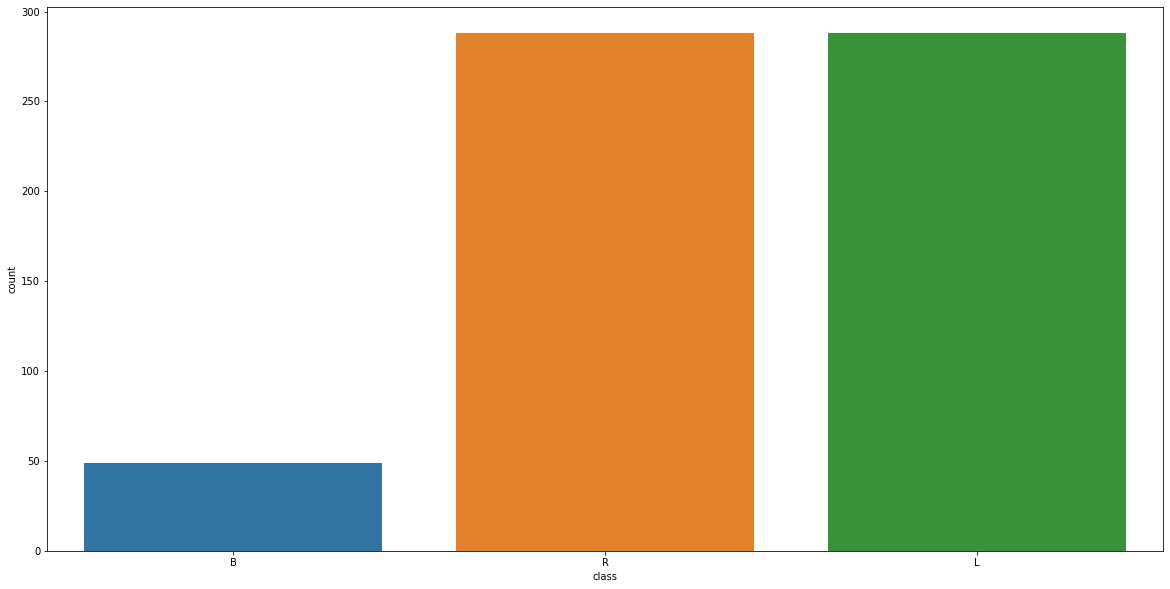

In [595]:
sns.countplot(df['class'])

#### <center>--- Séparation du jeu de données ---</center>

In [596]:
# On renomme la colonne 'class' en 'target'
df['target'] = df['class']

In [597]:
X = df[["leftweight","leftdistance","rightweight","rightdistance"]] 
y = df["target"]

In [598]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [599]:
print(X_train.shape)
print(X_test.shape)

(437, 4)
(188, 4)


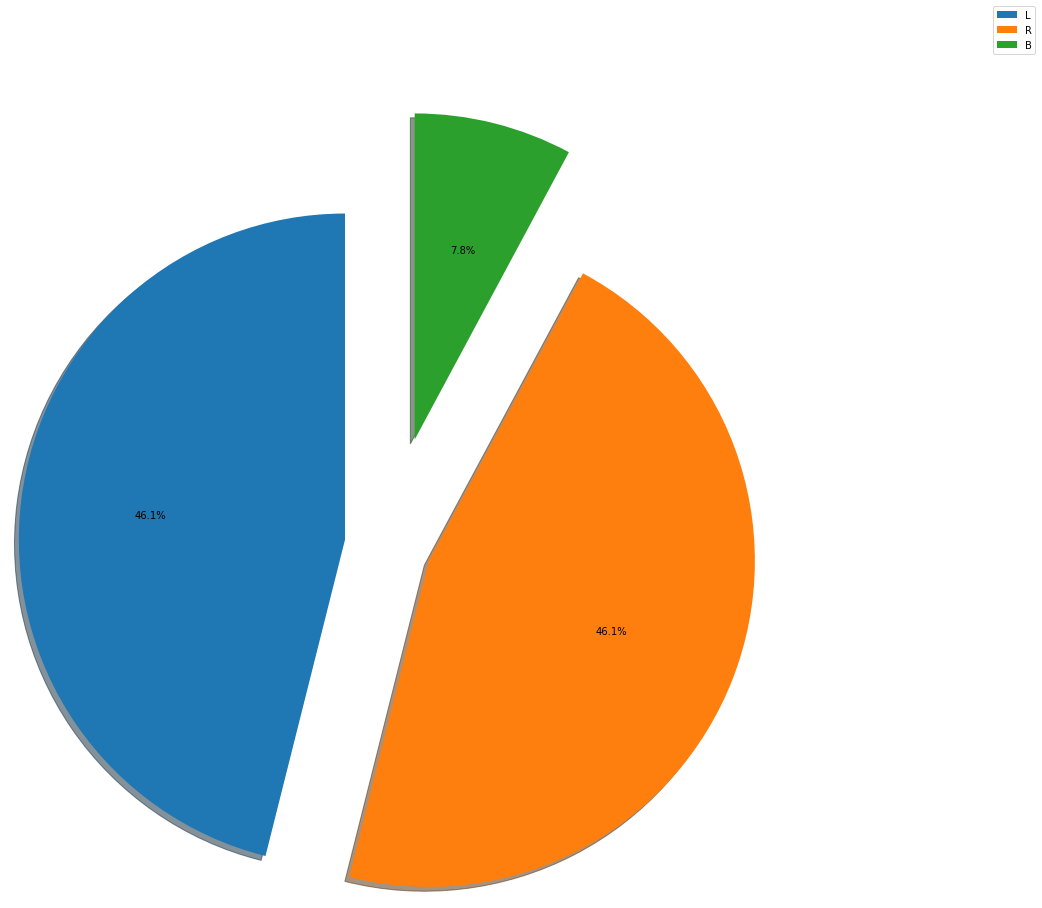

In [600]:
#Affichage visuel du résultat
plt.pie(x=df['target'].value_counts(), explode=(0.2,0.2,0.5), autopct="%1.1f%%", shadow=True,
        startangle=90, radius=1.5)
plt.legend(labels=df['target'].value_counts().index, bbox_to_anchor=(1.7, 1.5))
plt.show()

#  Régression Logistique

In [601]:

# Entraînement du modèle de régression logistique
lr = LogisticRegression()
lr.fit(X_train, y_train,)
# Affichage des résultats
y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          B       0.43      0.27      0.98      0.33      0.52      0.25        11
          L       0.90      0.93      0.89      0.91      0.91      0.83        96
          R       0.89      0.90      0.92      0.90      0.91      0.82        81

avg / total       0.87      0.88      0.91      0.87      0.89      0.79       188



In [602]:
print(lr.score(X_test, y_test))

0.8776595744680851


In [603]:
 print (np.unique(y_pred ))

['B' 'L' 'R']


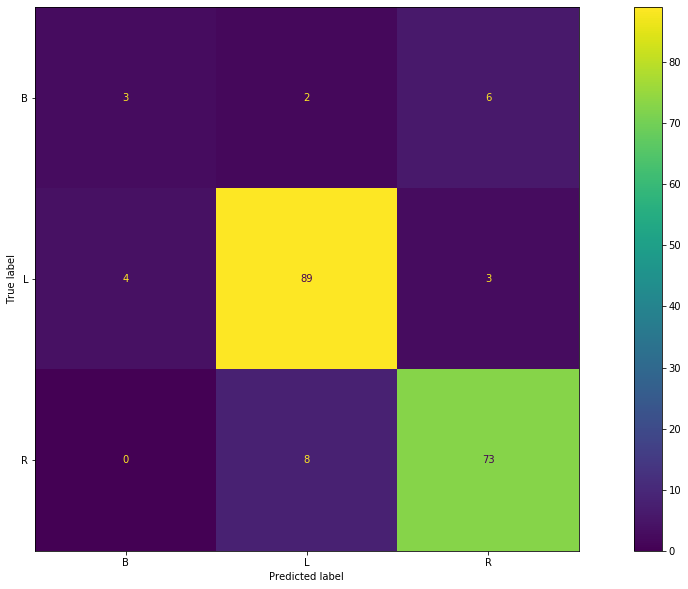

In [604]:
# Matrice de correlation
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

# XGBoost

In [1]:
from xgboost import XGBClassifier
import xgboost as xgb
# Création du model
model = XGBClassifier()
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 0)
# Appliquer le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Vérifier la précision 
print(model.score(X_test, y_test))

# Visualisation de l'importance des features d'entrées sur la prédiction 
plt.rcParams["figure.figsize"] = (20, 10)
xgb.plot_importance(model._Booster)

NameError: name 'train_test_split' is not defined

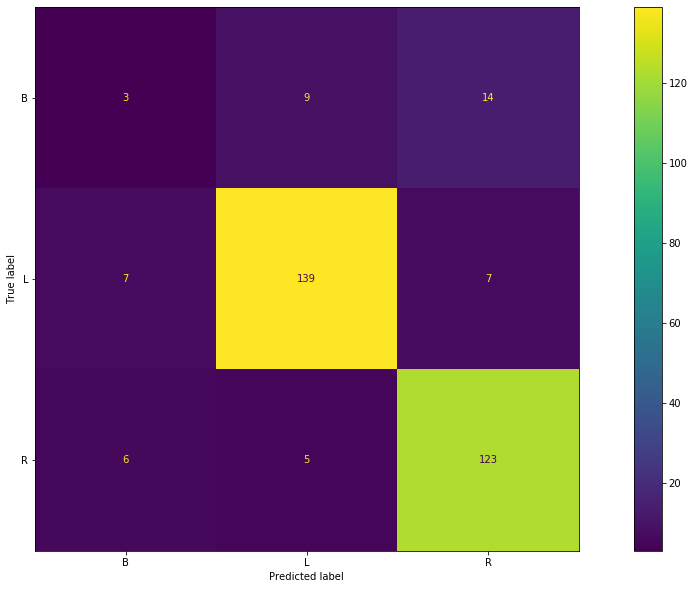

In [606]:
# Matrice de correlation
plot_confusion_matrix(model, X_test, y_test)
plt.show()

# Random Forest

In [607]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  84.66453674121406


In [608]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.19      0.12      0.14        26
           L       0.91      0.91      0.91       153
           R       0.85      0.92      0.88       134

    accuracy                           0.85       313
   macro avg       0.65      0.65      0.65       313
weighted avg       0.83      0.85      0.83       313



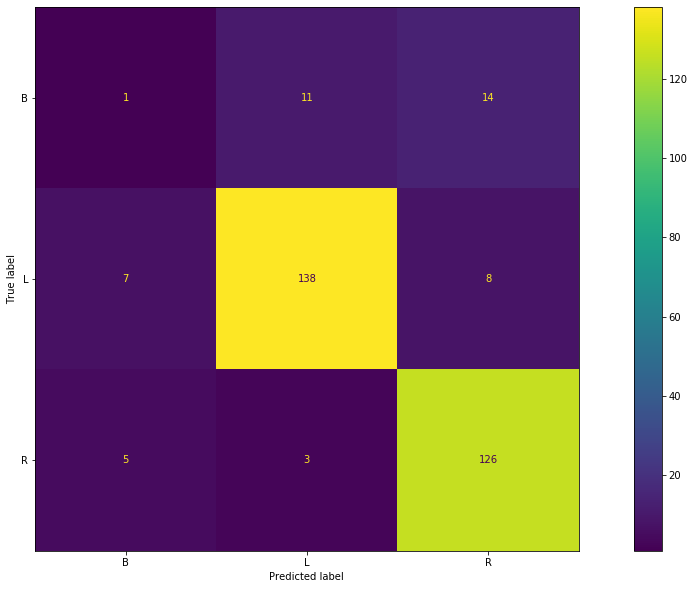

In [609]:
# Matrice de correlation
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

# Decision Tree

In [610]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
pred = clf_dt.predict(X_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  74.76038338658148


In [611]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.19      0.12      0.14        26
           L       0.91      0.91      0.91       153
           R       0.85      0.92      0.88       134

    accuracy                           0.85       313
   macro avg       0.65      0.65      0.65       313
weighted avg       0.83      0.85      0.83       313



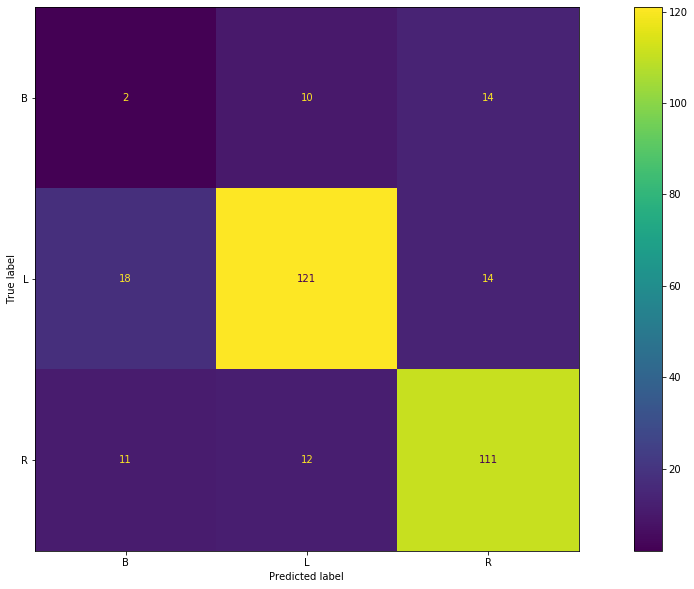

In [612]:
# Matrice de correlation
plot_confusion_matrix(clf_dt, X_test, y_test)
plt.show()

# Utiliser des méthodes de rééchantillonnage 

#### <center>--- Rééquilibrage du jeu de données par sous-échantillonnage : Undersampling (RandomUnderSampler) ---</center>

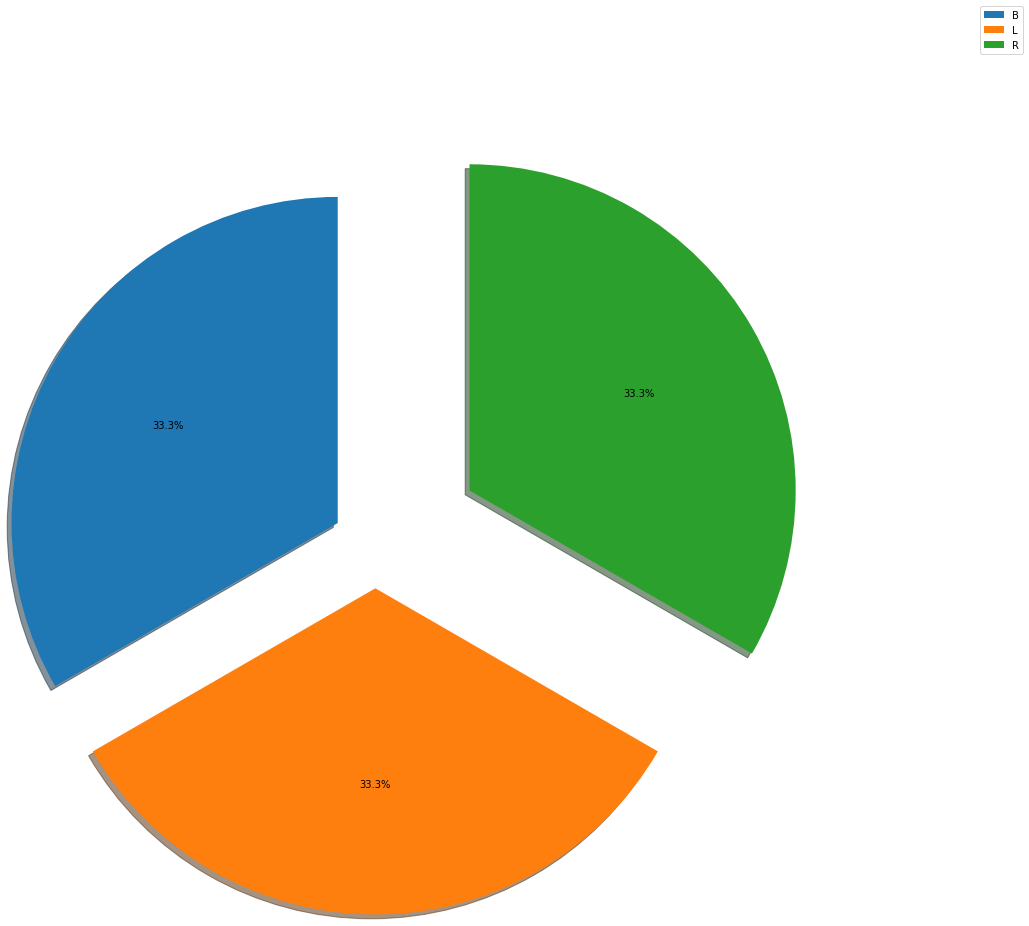

In [613]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

plt.pie(x=y_rus.value_counts(), explode=(0.2,0.2,0.5), autopct="%1.1f%%", shadow=True,
        startangle=90, radius=1.5)
plt.legend(labels=y_rus.value_counts().index, bbox_to_anchor=(1.7, 1.5))
plt.show()

#### <center>--- Séparation du jeu de données ---</center>

#  Régression Logistique

In [614]:
# Entraînement du modèle de régression logistique
lr = LogisticRegression()
lr.fit(X_rus, y_rus)
# Affichage des résultats
y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          B       0.28      0.88      0.79      0.42      0.84      0.71        26
          L       0.97      0.72      0.98      0.83      0.84      0.69       153
          R       0.97      0.84      0.98      0.90      0.91      0.81       134

avg / total       0.91      0.79      0.96      0.82      0.87      0.74       313



In [615]:
print(lr.score(X_test, y_test))


0.7859424920127795


In [616]:
print('Original dataset shape %s' % Counter(y_rus))

Original dataset shape Counter({'B': 23, 'L': 23, 'R': 23})


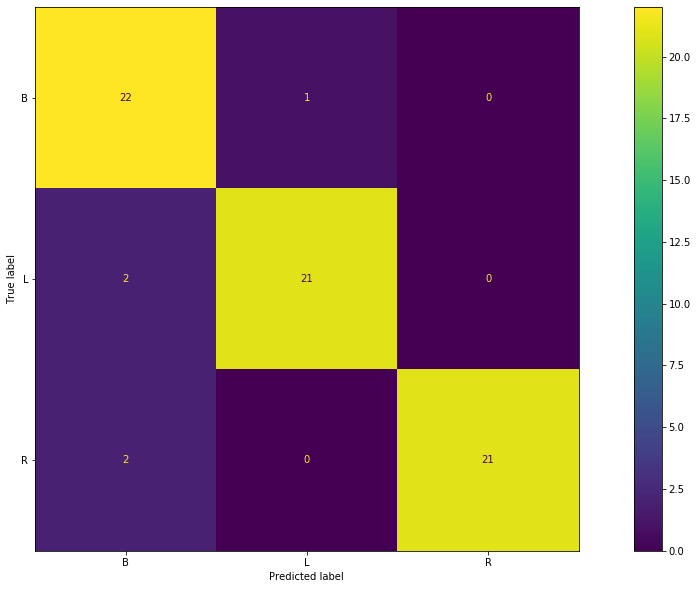

In [617]:
# Matrice de correlation
plot_confusion_matrix(lr, X_rus, y_rus)
plt.show()

# XGBoost

0.7142857142857143


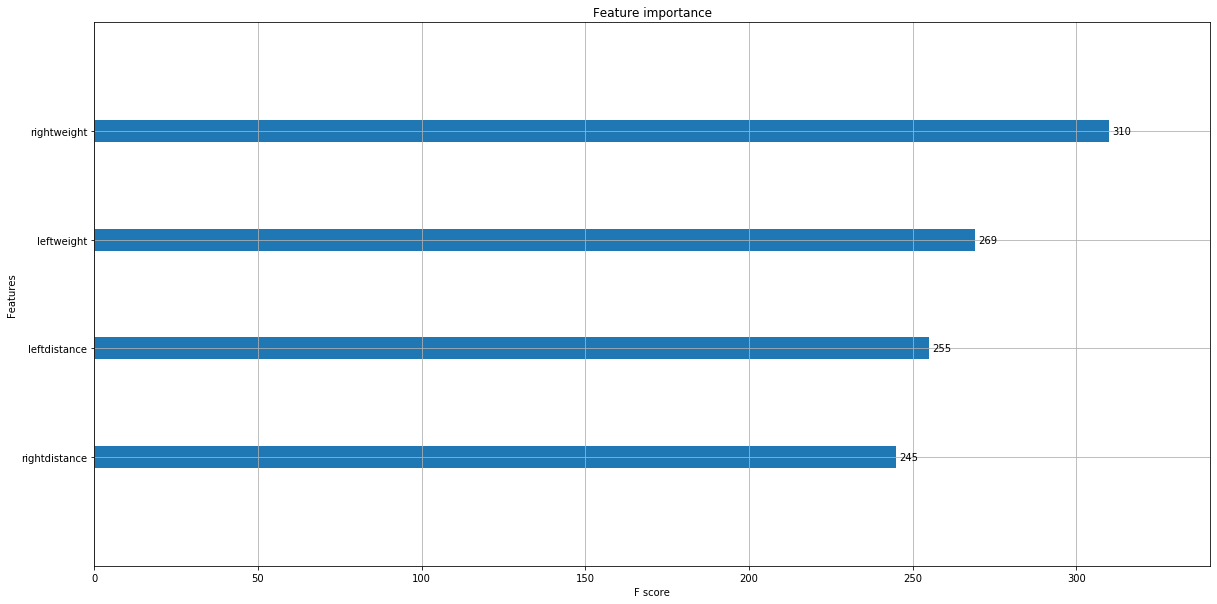

In [619]:
from xgboost import XGBClassifier
import xgboost as xgb
# Création du model
model = XGBClassifier()
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state = 0)
# Appliquer le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Vérifier la précision 
print(model.score(X_test, y_test))

# Visualisation de l'importance des features d'entrées sur la prédiction 
plt.rcParams["figure.figsize"] = (20, 10)
xgb.plot_importance(model)

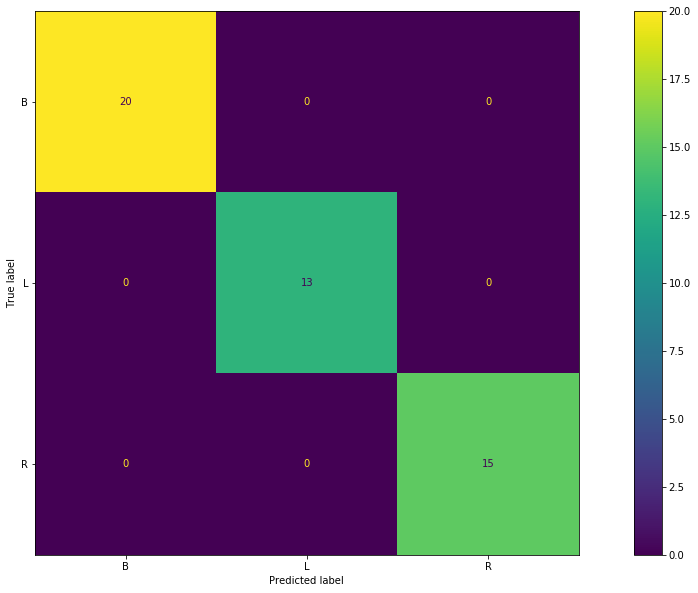

In [620]:
# Matrice de correlation
plot_confusion_matrix(model, X_train, y_train)
plt.show()

# Random Forest

In [621]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(X_rus, y_rus)
pred = clf.predict(X_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  100.0


In [622]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.20      0.33      0.25         3
           L       0.88      0.70      0.78        10
           R       0.88      0.88      0.88         8

    accuracy                           0.71        21
   macro avg       0.65      0.64      0.63        21
weighted avg       0.78      0.71      0.74        21



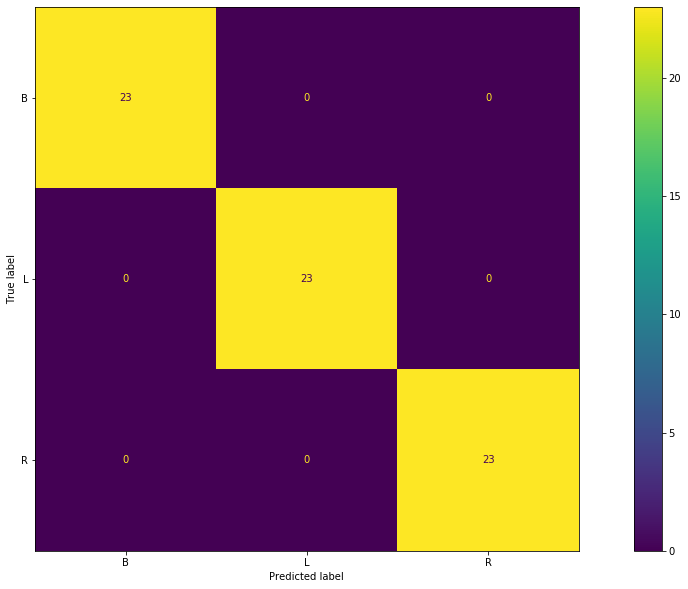

In [623]:
# Matrice de correlation
plot_confusion_matrix(clf, X_rus, y_rus)
plt.show()

# Decision Tree

In [624]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_rus, y_rus)
pred = clf_dt.predict(X_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  100.0


In [625]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.20      0.33      0.25         3
           L       0.88      0.70      0.78        10
           R       0.88      0.88      0.88         8

    accuracy                           0.71        21
   macro avg       0.65      0.64      0.63        21
weighted avg       0.78      0.71      0.74        21



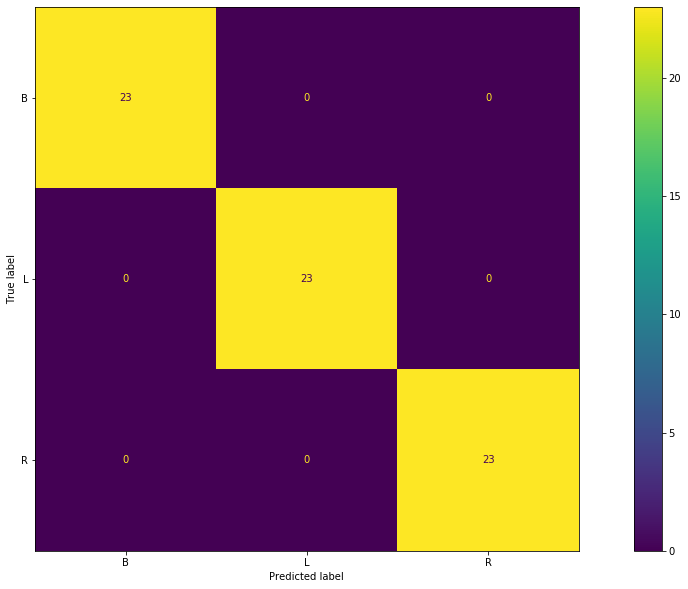

In [626]:
# Matrice de correlation
plot_confusion_matrix(clf_dt, X_rus, y_rus)
plt.show()

#### <center>--- Rééquilibrage du jeu de données par sur-échantillonnage : Oversampling (RandomOverSampler) ---</center>

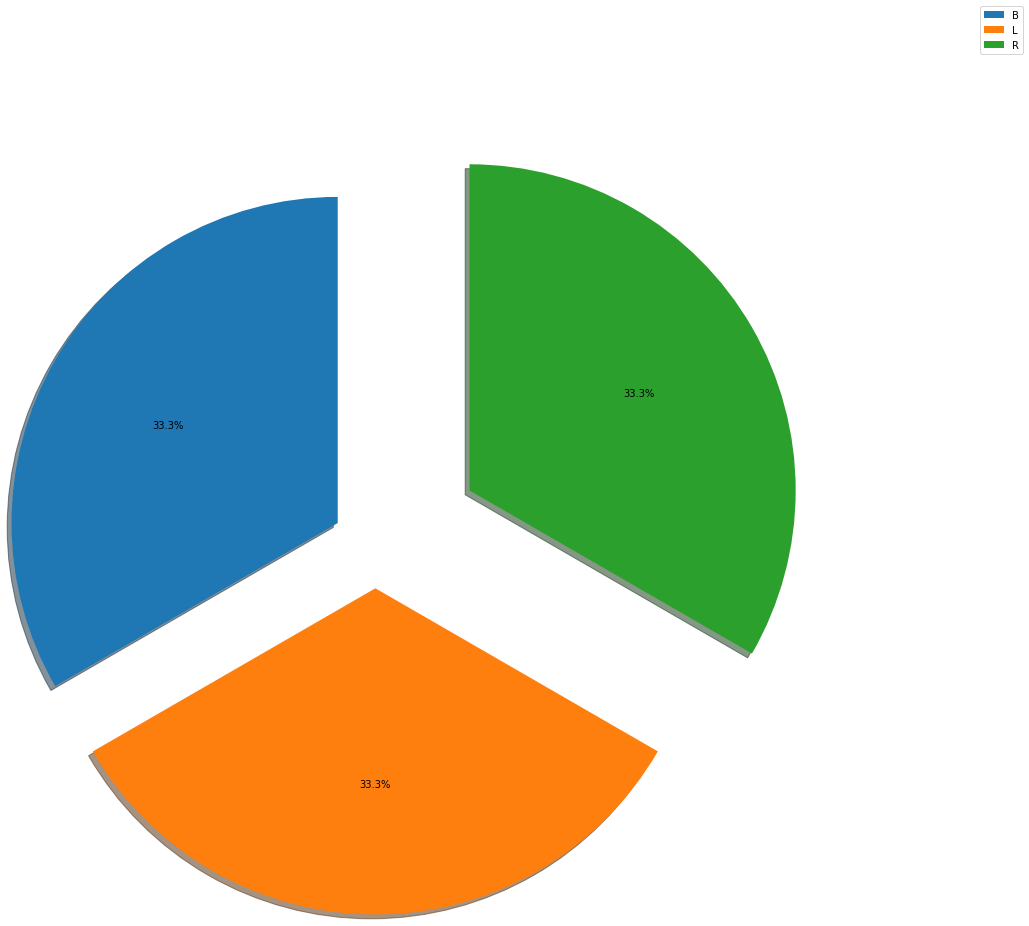

In [627]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)
plt.pie(x=y_ros.value_counts(), explode=(0.2,0.2,0.5), autopct="%1.1f%%", shadow=True,
        startangle=90, radius=1.5)
plt.legend(labels=y_ros.value_counts().index, bbox_to_anchor=(1.7, 1.5))
plt.show()

In [628]:
print('Original dataset shape %s' % Counter(y_ros))

Original dataset shape Counter({'B': 20, 'R': 20, 'L': 20})


#  Régression Logistique

In [629]:
# Entraînement du modèle de régression logistique
lr1 = LogisticRegression()
lr1.fit(X_ros, y_ros)
# Affichage des résultats
y_pred = lr1.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          B       0.67      0.67      0.94      0.67      0.79      0.61         3
          L       1.00      0.90      1.00      0.95      0.95      0.89        10
          R       0.89      1.00      0.92      0.94      0.96      0.93         8

avg / total       0.91      0.90      0.96      0.90      0.93      0.87        21



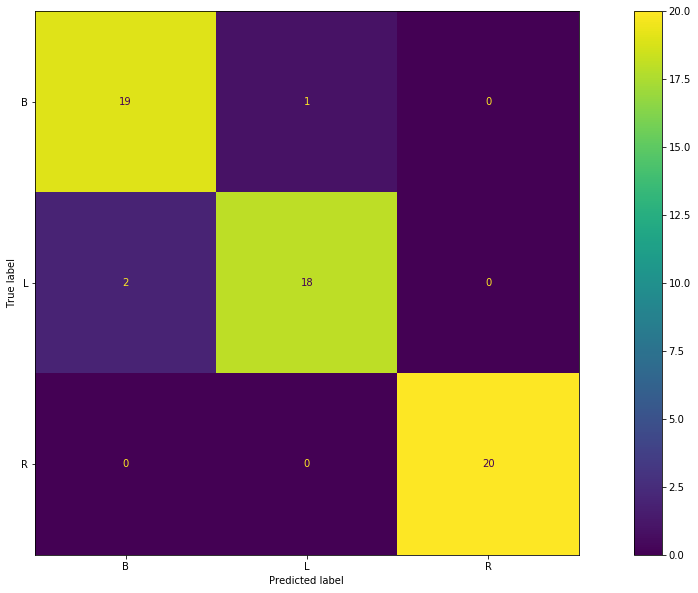

In [630]:
# Matrice de correlation
plot_confusion_matrix(lr1, X_ros, y_ros)
plt.show()

In [631]:
print(model.score(X_test, y_test))


0.7142857142857143


# XGBoost

0.8888888888888888


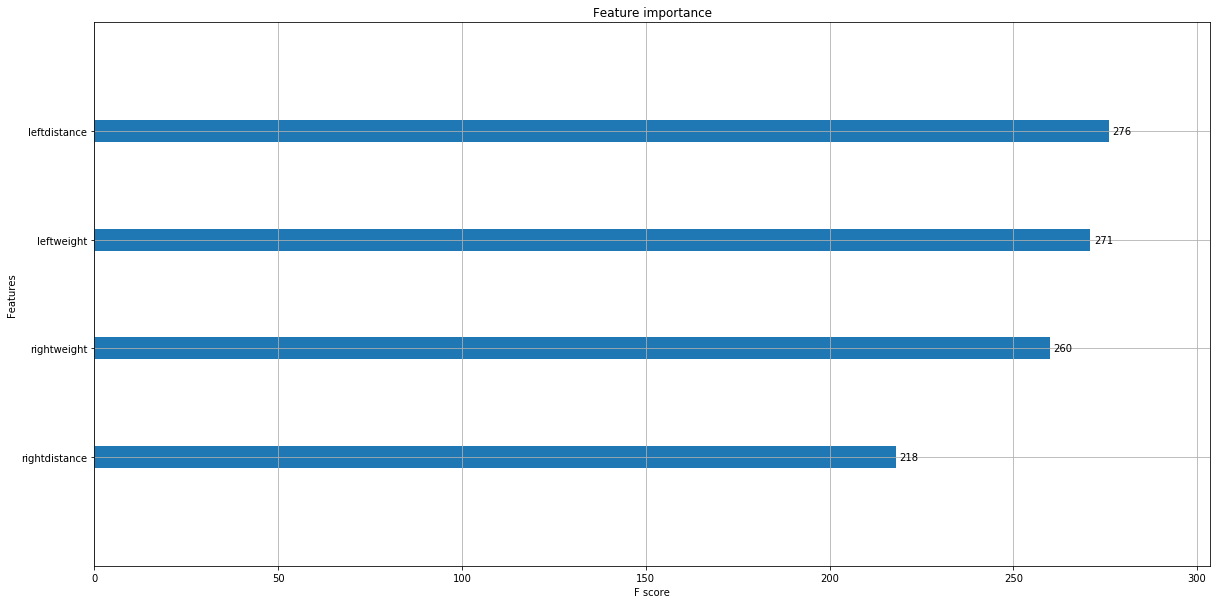

In [632]:
from xgboost import XGBClassifier
import xgboost as xgb
# Création du model
model = XGBClassifier()
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state = 0)
# Appliquer le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Vérifier la précision 
print(model.score(X_test, y_test))

# Visualisation de l'importance des features d'entrées sur la prédiction 
plt.rcParams["figure.figsize"] = (20, 10)
xgb.plot_importance(model)

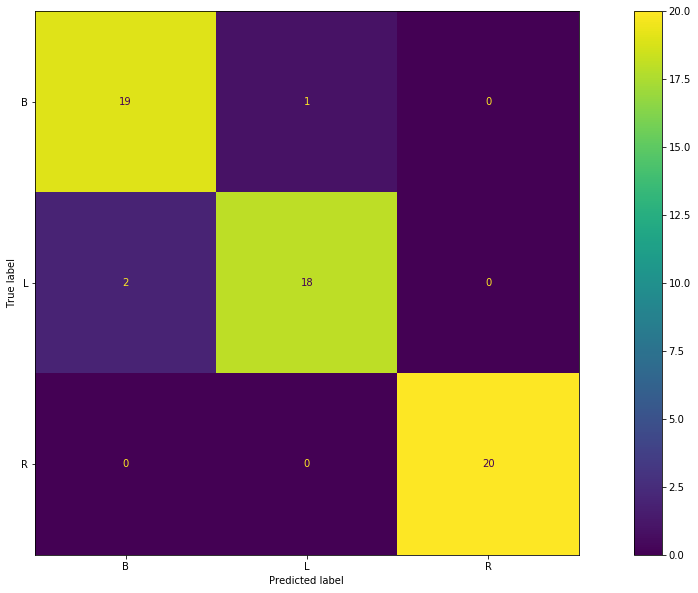

In [633]:
# Matrice de correlation
plot_confusion_matrix(lr1, X_ros, y_ros)
plt.show()

# Random Forest

In [634]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(X_ros, y_ros)
pred = clf.predict(X_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  100.0


In [635]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.80      0.80      0.80         5
           L       1.00      0.88      0.93         8
           R       0.83      1.00      0.91         5

    accuracy                           0.89        18
   macro avg       0.88      0.89      0.88        18
weighted avg       0.90      0.89      0.89        18



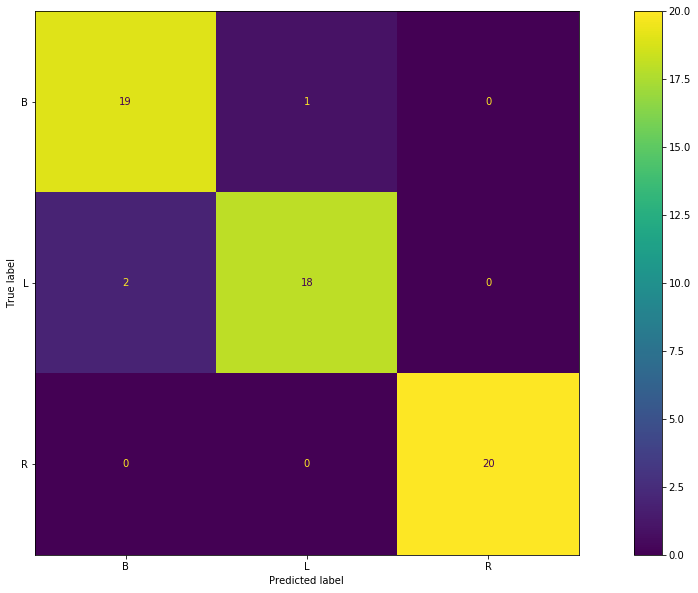

In [636]:
# Matrice de correlation
plot_confusion_matrix(lr1, X_ros, y_ros)
plt.show()

# Decision Tree

In [637]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(X_ros, y_ros)
pred = clf.predict(X_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  100.0


In [638]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.80      0.80      0.80         5
           L       1.00      0.88      0.93         8
           R       0.83      1.00      0.91         5

    accuracy                           0.89        18
   macro avg       0.88      0.89      0.88        18
weighted avg       0.90      0.89      0.89        18



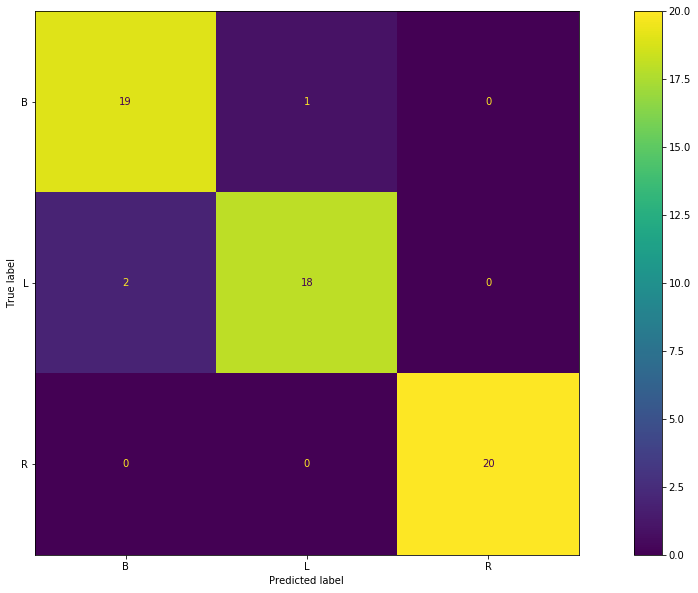

In [639]:
# Matrice de correlation
plot_confusion_matrix(lr1, X_ros, y_ros)
plt.show()

#### <center>--- Rééquilibrage du jeu de données par sur-échantillonnage : Oversampling (Smote) ---</center>

In [640]:
# Rééquilibrage par Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'B': 15, 'R': 15, 'L': 15})


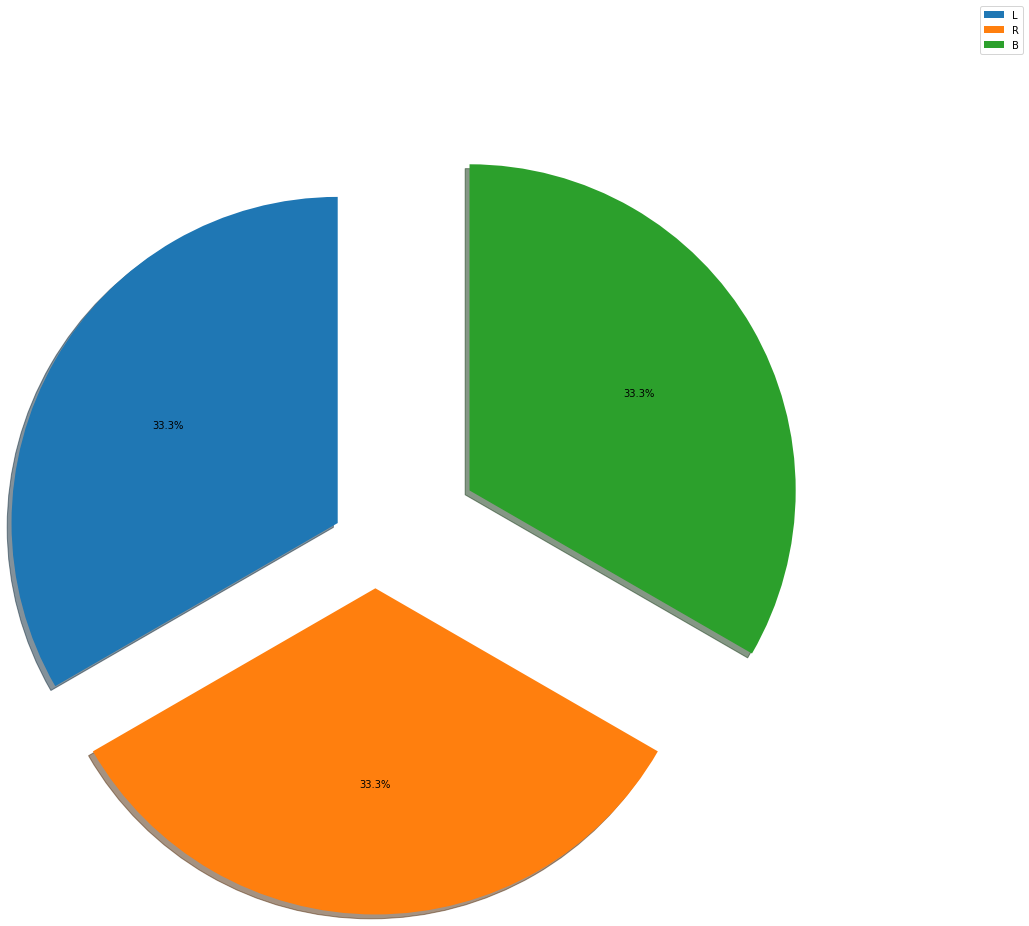

In [641]:
plt.pie(x=y_res.value_counts(), explode=(0.2,0.2,0.5), autopct="%1.1f%%", shadow=True,
        startangle=90, radius=1.5)
plt.legend(labels=df['target'].value_counts().index, bbox_to_anchor=(1.7, 1.5))
plt.show()

#  Régression Logistique

In [642]:
# Entraînement du modèle de régression logistique
lr1 = LogisticRegression()
lr1.fit(X_res, y_res)
# Affichage des résultats
y_pred = lr1.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          B       0.71      1.00      0.85      0.83      0.92      0.86         5
          L       1.00      0.88      1.00      0.93      0.94      0.86         8
          R       1.00      0.80      1.00      0.89      0.89      0.78         5

avg / total       0.92      0.89      0.96      0.89      0.92      0.84        18



In [643]:
print(model.score(X_test, y_test))


0.8888888888888888


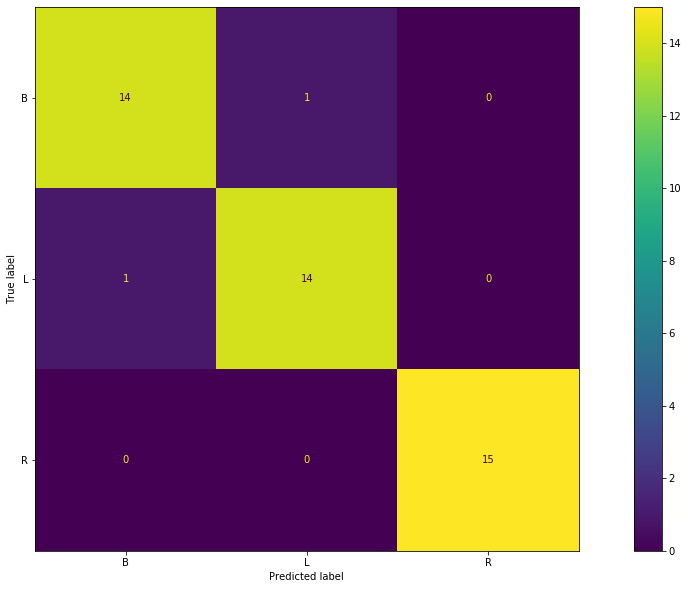

In [644]:
# Matrice de correlation
plot_confusion_matrix(lr1, X_res, y_res)
plt.show()

# XGBoost

0.4782608695652174


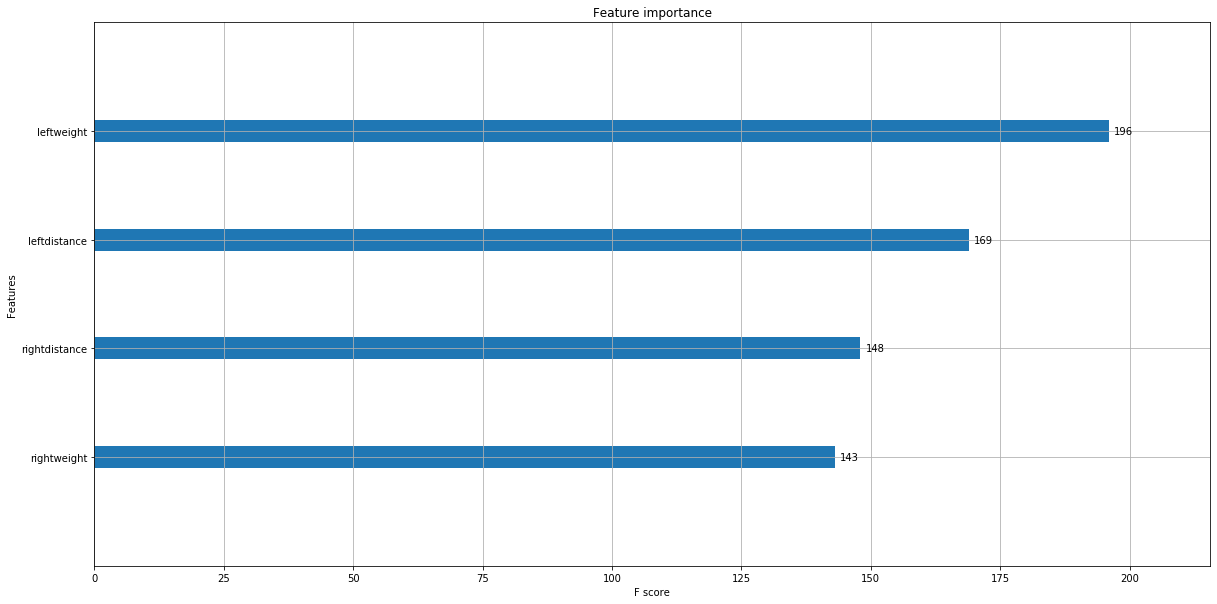

In [645]:
from xgboost import XGBClassifier
import xgboost as xgb
# Création du model
model = XGBClassifier()
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.5, random_state = 0)
# Appliquer le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Vérifier la précision méthod 2
print(model.score(X_test, y_test))

# Visualisation de l'importance des features d'entrées sur la prédiction 
plt.rcParams["figure.figsize"] = (20, 10)
xgb.plot_importance(model)

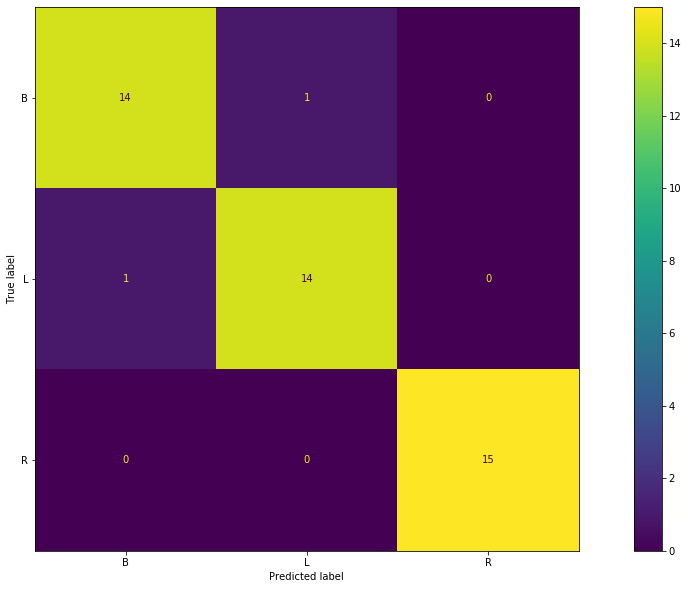

In [646]:
# Matrice de correlation
plot_confusion_matrix(lr1, X_res, y_res)
plt.show()

# Random Forest

In [647]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(X_res, y_res)
pred = clf.predict(X_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  100.0


In [648]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.14      0.14      0.14         7
           L       0.60      0.67      0.63         9
           R       0.67      0.57      0.62         7

    accuracy                           0.48        23
   macro avg       0.47      0.46      0.46        23
weighted avg       0.48      0.48      0.48        23



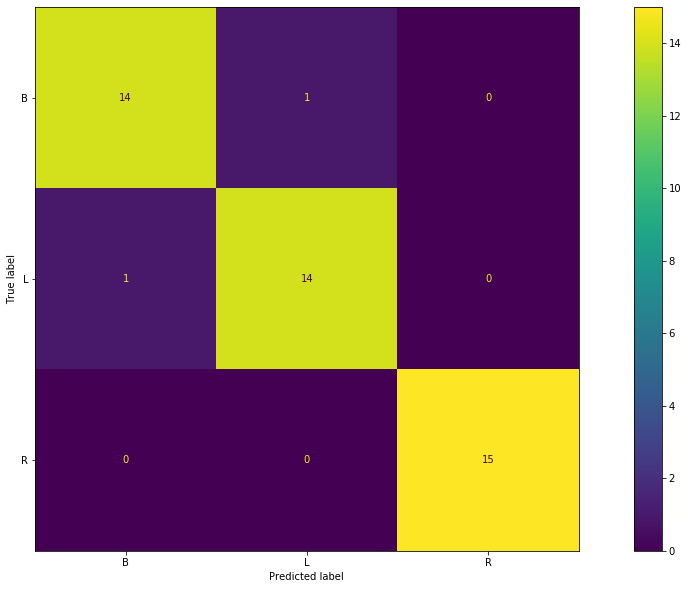

In [649]:
# Matrice de correlation
plot_confusion_matrix(lr1, X_res, y_res)
plt.show()

# Decision Tree

In [650]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(X_res, y_res)
pred = clf.predict(X_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  100.0


In [651]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.14      0.14      0.14         7
           L       0.60      0.67      0.63         9
           R       0.67      0.57      0.62         7

    accuracy                           0.48        23
   macro avg       0.47      0.46      0.46        23
weighted avg       0.48      0.48      0.48        23



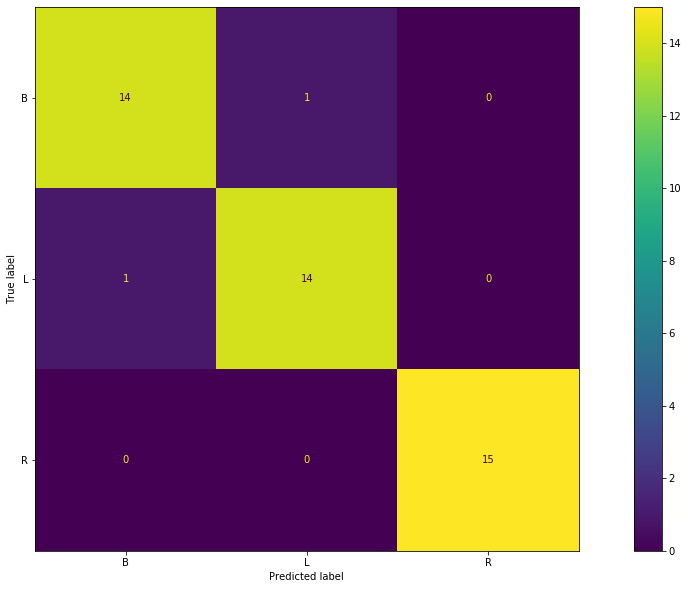

In [652]:
# Matrice de correlation
plot_confusion_matrix(lr1, X_res, y_res)
plt.show()



# CONCLUSION

#### <center>--- Sans Rééquilibrage du jeu de données---</center>

# Comparaison des scores de précision globale des modèles par algorithme en utilisant différentes méthodes de rééchantillonnage

#### <center>--- Rééquilibrage du jeu de données par sous-échantillonnage : Undersampling (RandomUnderSampler) ---</center>

#### <center>--- Rééquilibrage du jeu de données par sur-échantillonnage : Oversampling (RandomOverSampler) ---</center>

#### <center>--- Rééquilibrage du jeu de données par sur-échantillonnage : Oversampling (Smote) ---</center>

# AUTRES METHODES

In [676]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [667]:
 #Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [668]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df.target, random_state = 0)

In [672]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   LR  0.885350
1  XGB  0.847134
2   RF  0.828025
3   DT  0.783439


In [677]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0   LR  0.851254
1  XGB  0.750589
2   RF  0.697645
3   DT  0.664081


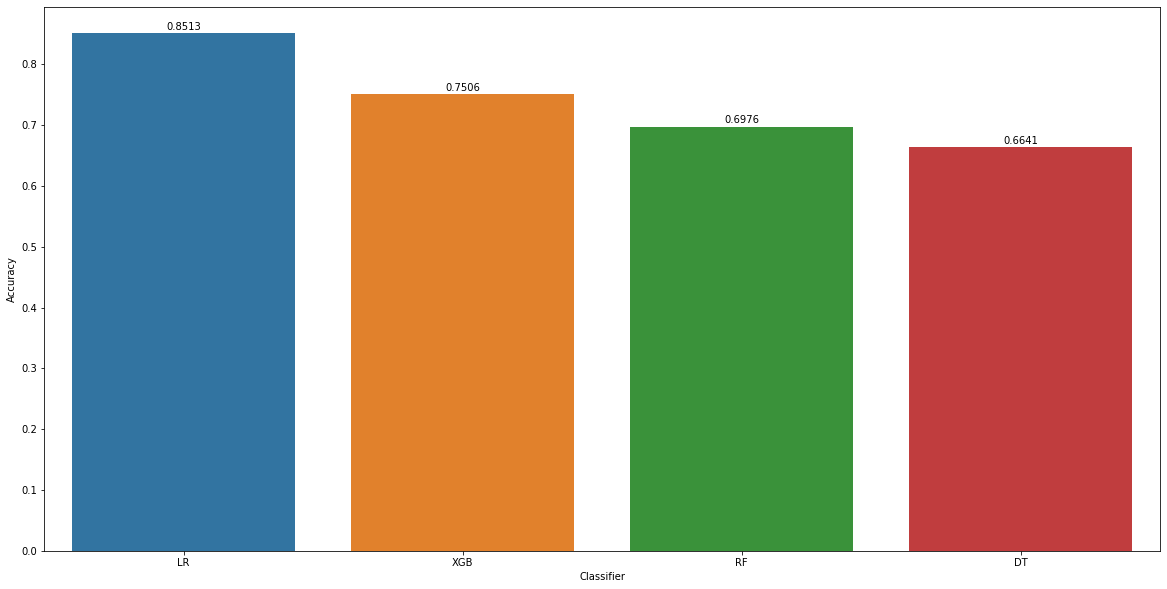

In [678]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

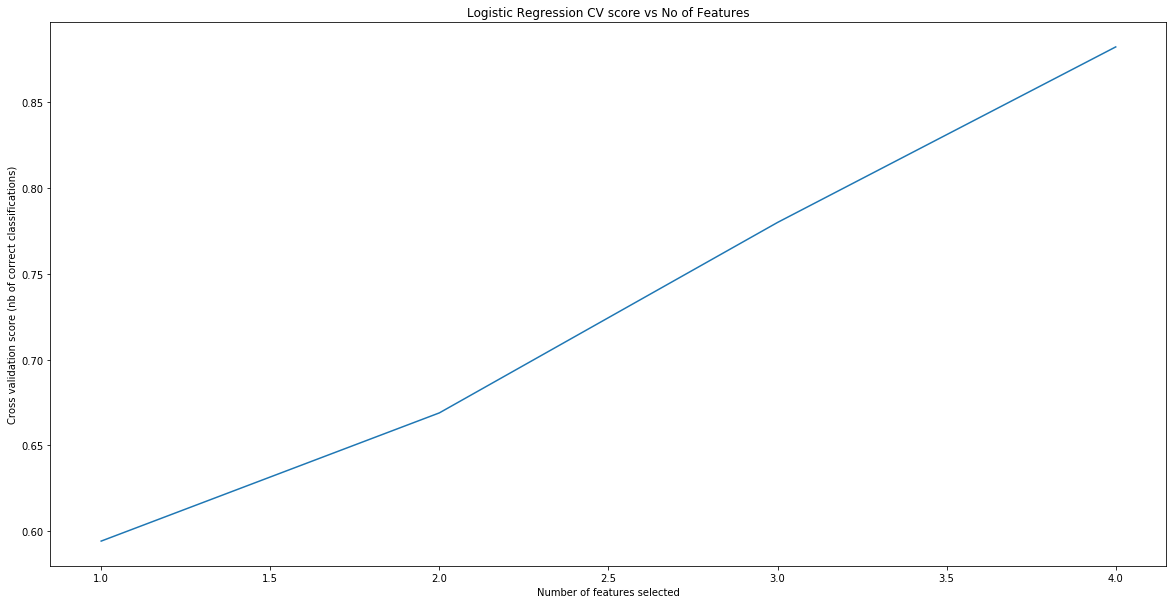

In [707]:

from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X_train, y_train)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



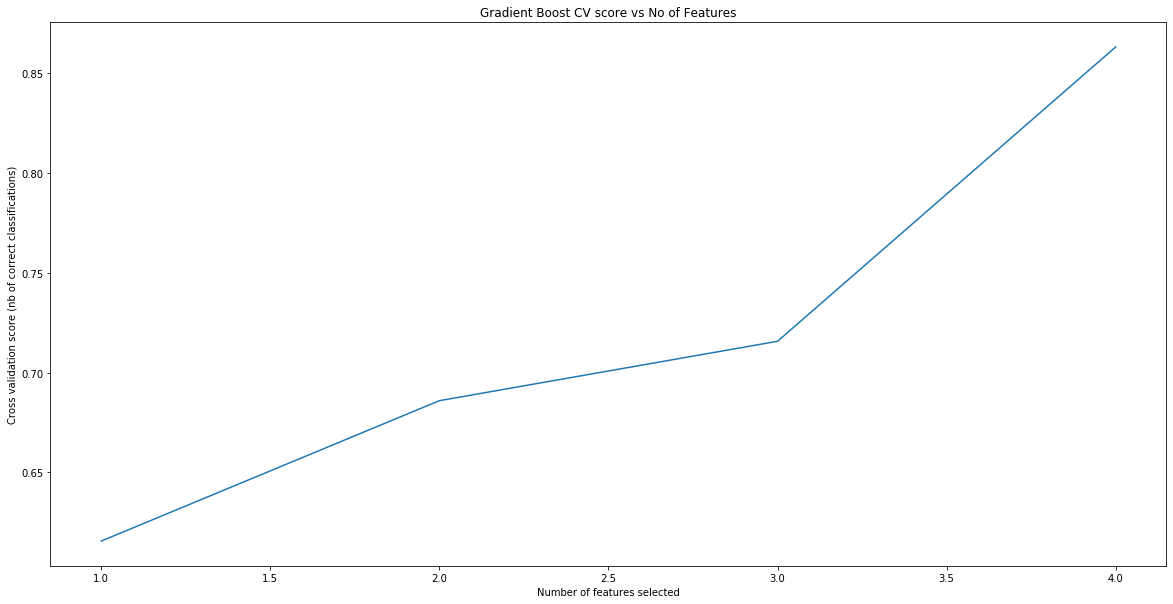

In [708]:


xgb_model = XGBClassifier()

xgb_rfecv = RFECV(estimator=xgb_model, step=1, cv=strat_k_fold, scoring='accuracy')
xgb_rfecv.fit(X_train, y_train)

plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(xgb_rfecv.grid_scores_) + 1), xgb_rfecv.grid_scores_)
plt.show()



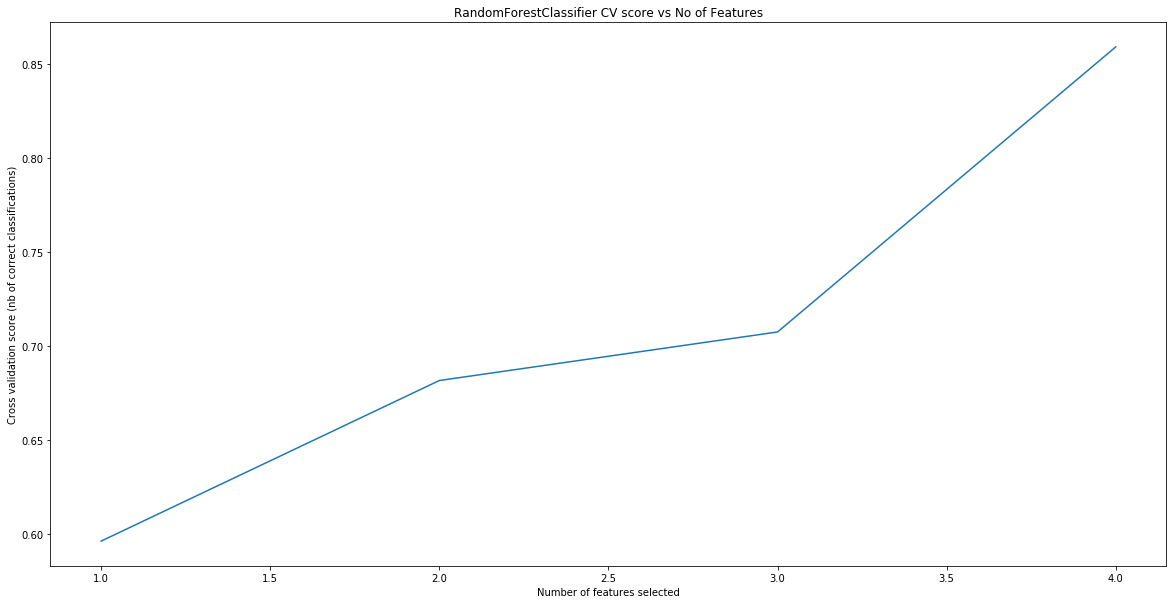

In [710]:
from sklearn.feature_selection import RFECV
rf_model = RandomForestClassifier()

rf_rfecv = RFECV(estimator=rf_model, step=1, cv=strat_k_fold, scoring='accuracy')
rf_rfecv.fit(X_train, y_train)

plt.figure()
plt.title('RandomForestClassifier CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rf_rfecv.grid_scores_) + 1), rf_rfecv.grid_scores_)
plt.show()